In [65]:
#This midterm will be a little different.  The zip file includes 30-35 different stock tickers as well as two aggregate csv files with all stocks.  Your ask is as follows:

#1. Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 
#2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.
#3. You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.
#4. Take five stocks of your choice and create the same type of report stated in question 2.

#Notes:

#You need to write a report for every question in a cell before solving the question. In this report, you need to write what approach you are considering to solve each question. You can include visualization, code or anything whatever you think best describe your approach. (25%)
#Midterm contains three questions. For every question weighttag of marks is 25%. 

In [66]:
#Read in all stock tickers as variables. 

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from matplotlib.patches import PathPatch
%matplotlib inline

In [2]:
#1. Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

#Steps to accomplish this
#1. read all files in from the stock-time-series-20050101-to-20171231 subfolder containing CSV 
#2. create dictionary for ease of use storing dataframes
#3. Loop through files. read each file into a dataframe and save using string parsing on the title
#   String parsing os agnostic :)
#4. Read in all stock csvs into their own variables 

In [3]:
files = glob.glob('stock-time-series-20050101-to-20171231/*.csv')

In [4]:
#intialize empty dictionary that we will append dataframes to
stocks = {}

In [5]:
#for each file in the list we will read in the csv data.
for file in files:
    stock = pd.read_csv(file) 
    #check for windows or *nix
    if os.name == 'nt':
        x = file.split("\\")
    else:
        x = file.split("/")
    y = x[1].split("_")
    #intialize empty list that we will append dataframes to
    stocks[y[0]] = stock

In [6]:
#Sanity check. printing out the keys to ensure we have read in the stock properly.
for key, value in stocks.items() :
    print (key)

JPM
MSFT
JNJ
UNH
CAT
AABA
HD
CVX
MMM
AMZN
CSCO
XOM
all
VZ
WMT
GS
AAPL
AXP
GOOGL
UTX
KO
MRK
TRV
IBM
INTC
PFE
GE
DIS
PG
BA
MCD
NKE


In [7]:
#Monthly stock prices for 2018
all_stocks_2006 = pd.read_csv('stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv')

In [8]:
#Daily stock price for 2018
all_stocks_2018 = pd.read_csv('stock-time-series-20050101-to-20171231/all_stocks_2017-01-01_to_2018-01-01.csv')

In [9]:
#I didn't want to have 30 plus statements reading in each stock into an individual variable.
#It just made sense in my opinion to load all the stock csvs into a dictionary and reference from there.
#however all stocks added to their own variables for parsing simplicity.

In [10]:
#2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

#We will use AABA, Altaba, to answer this question and just look at the data over a 3 month period.

#Altaba Inc. is an investment company based in New York City that resulted from Verizon's acquisition of Yahoo! Inc's Internet business. 
#The company that remained after the purchase changed its name to Altaba Inc. on June 16, 2017

#My approach for this problem is to take a 3 month time period and use various charts to find insights.

In [11]:
#Use the start_date and end_date as variables so they can be adjusted for multiple time periods.

In [12]:
start_date = "2006-07-06"
end_date = "2006-10-06"

In [13]:
#Create variable AABA for Altaba stock ticker using the stock dictionary

In [14]:
AABA = stocks['AABA']

In [15]:
#Describe and print basic information of the dataframe.

In [16]:
AABA.info

<bound method DataFrame.info of             Date   Open   High    Low  Close     Volume  Name
0     2006-01-03  39.69  41.22  38.79  40.91   24232729  AABA
1     2006-01-04  41.22  41.90  40.77  40.97   20553479  AABA
2     2006-01-05  40.93  41.73  40.85  41.53   12829610  AABA
3     2006-01-06  42.88  43.57  42.80  43.21   29422828  AABA
4     2006-01-09  43.10  43.66  42.82  43.42   16268338  AABA
5     2006-01-10  42.96  43.34  42.34  42.98   16288580  AABA
6     2006-01-11  42.19  42.31  41.72  41.87   26192772  AABA
7     2006-01-12  41.92  41.99  40.76  40.89   18921686  AABA
8     2006-01-13  41.00  41.08  39.62  39.90   30966185  AABA
9     2006-01-17  39.09  40.39  38.96  40.11   42429911  AABA
10    2006-01-18  35.01  36.16  34.74  35.18  118670393  AABA
11    2006-01-19  35.82  35.84  34.24  34.33   60918436  AABA
12    2006-01-20  34.44  34.66  33.21  33.74   57681688  AABA
13    2006-01-23  34.22  34.40  33.98  34.17   30894265  AABA
14    2006-01-24  34.55  35.20  34.51 

In [17]:
AABA.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [18]:
#Setting plot style to fivetheirtyeight
plt.style.use('fivethirtyeight')

In [19]:
#Simple explortary analysis. We will find the all time high price, low price and highest volume day.

#Find the all time high price
#Find the all time low price
#Find the highest volume day

In [20]:
name = "Altaba"

print(f"{name} all time highest price")
print(AABA.loc[AABA["Close"].idxmax()])
print(f"\n{name} all time lowest price")
print(AABA.loc[AABA["Close"].idxmin()])
print(f"\n{name} Highest volume day")
print(AABA.loc[AABA["Volume"].idxmax()])

Altaba all time highest price
Date      2017-11-24
Open           72.47
High           73.18
Low            72.31
Close          72.93
Volume       3356343
Name            AABA
Name: 2994, dtype: object

Altaba all time lowest price
Date      2008-11-20
Open             9.1
High           10.01
Low             8.94
Close           8.95
Volume      37316961
Name            AABA
Name: 727, dtype: object

Altaba Highest volume day
Date      2008-02-01
Open           28.68
High           29.83
Low            27.34
Close          28.38
Volume     438231658
Name            AABA
Name: 523, dtype: object


In [21]:
#Add the rolling mean to the stock
#Stock data is time series data so the moving average can often be used to analyze a stock from a long term perspective

In [22]:
#Calculate the two week moving average using the rolling function. 10 Business Days

In [23]:
AABA['Rolling Mean'] = AABA.Close.rolling(10).mean()

In [24]:
#Create a date filter variable that can be used to filter down rows in the data frame

In [25]:
datefilter = (AABA["Date"] >= start_date) & (AABA["Date"] <= end_date)

In [26]:
#Apply the filter to the dataframe to return data within the specified range

In [27]:
AABA_RANGE = AABA.loc[datefilter]

In [28]:
#Plot the price and rolling mean for the specified date range

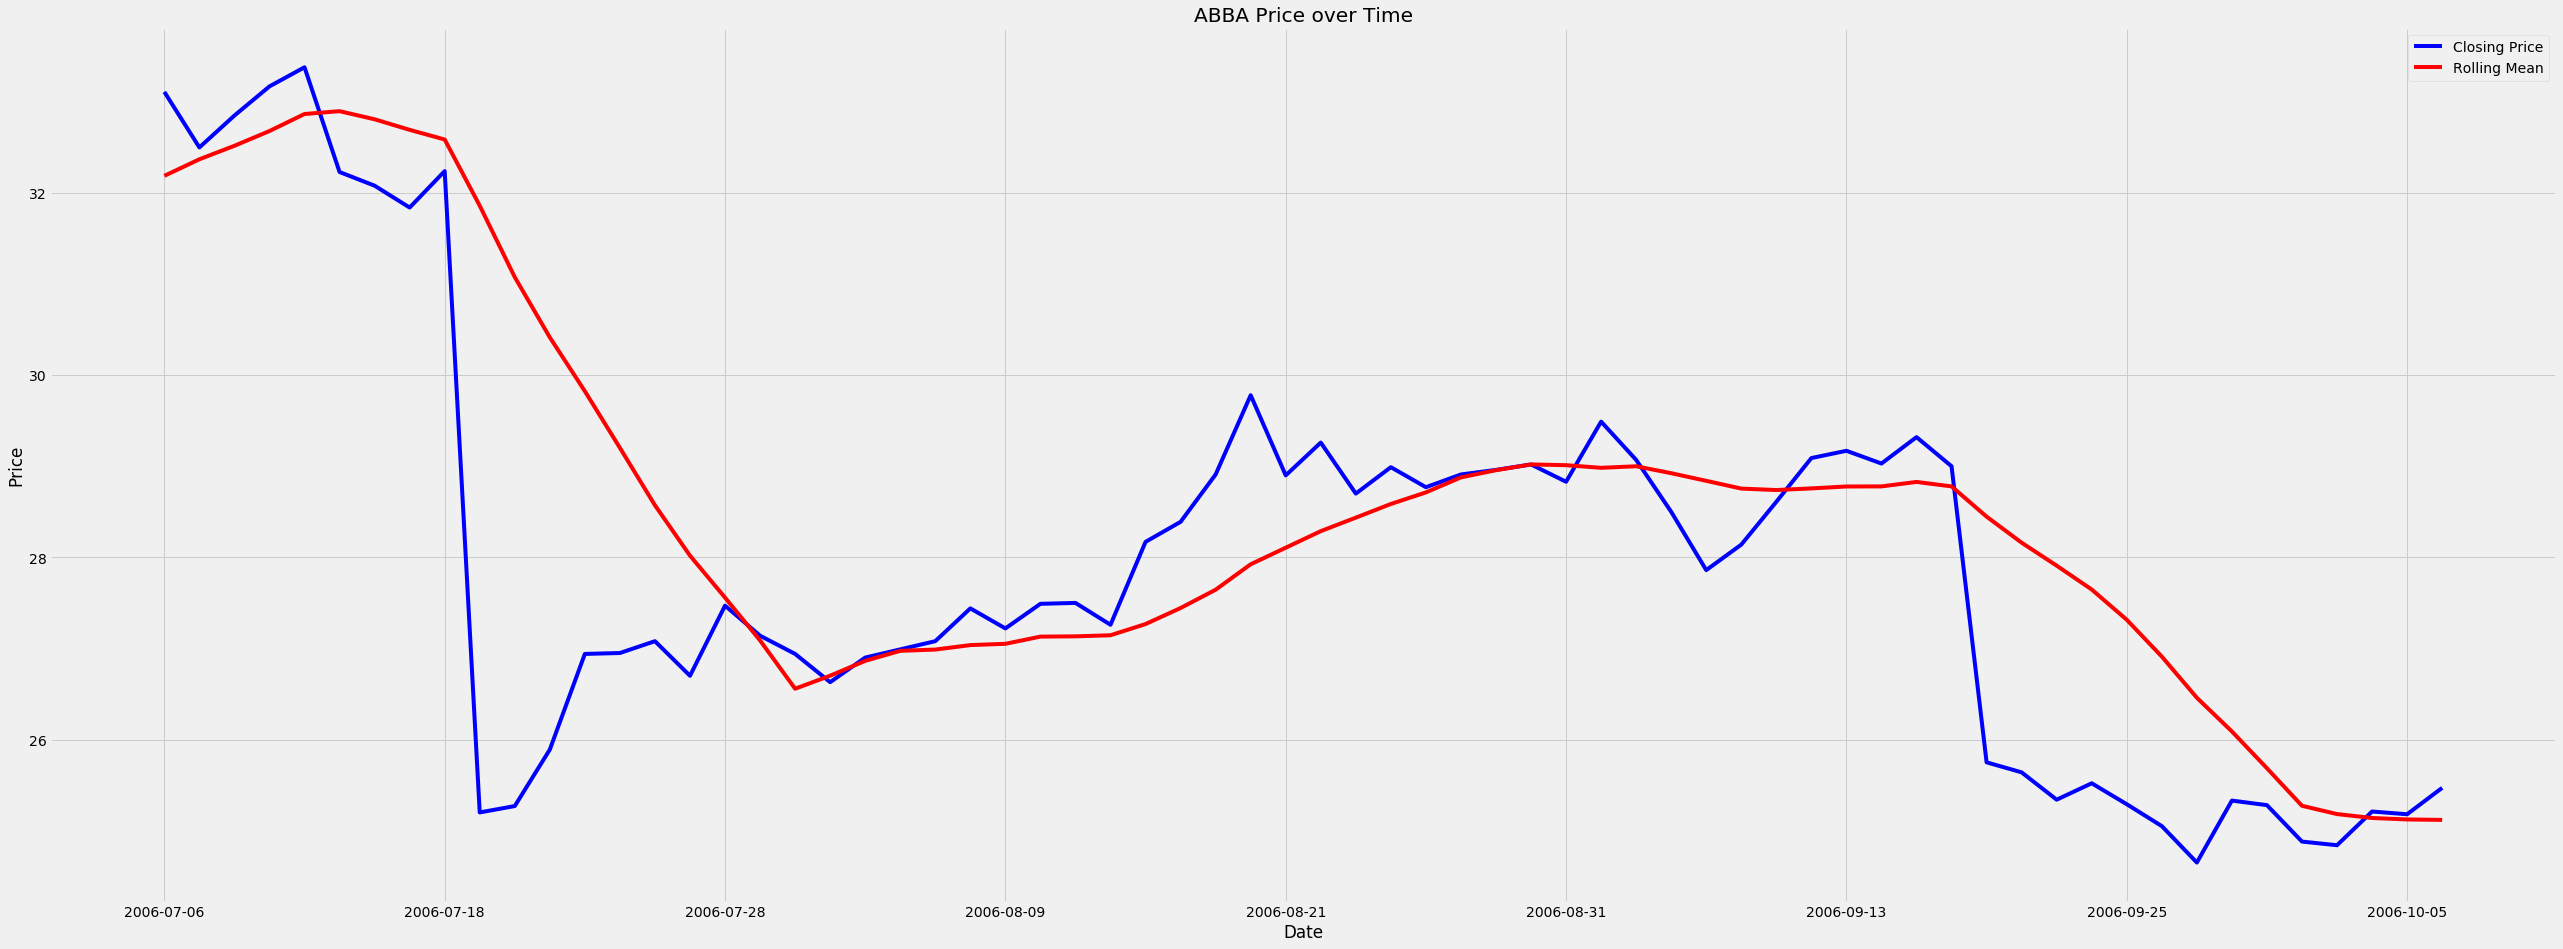

In [29]:
# Plotting the Price vs Rolling Mean
fig, ax = plt.subplots(figsize=(40,15))

#Create line graphs for closing price and rolling mean
plt.plot(AABA_RANGE["Date"], AABA_RANGE['Close'], Color="Blue") 
plt.plot(AABA_RANGE["Date"], AABA_RANGE['Rolling Mean'], Color="Red") 

# Set the y and x axis label
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

# Set the chart's title
ax.set_title('ABBA Price over Time')

# Adding the legend and showing the plot
plt.legend(['Closing Price','Rolling Mean'], loc='upper right')
plt.show()

In [30]:
#Plot the daily trading volume for the specified date range

Text(0.5,1,'AABA Price over time')

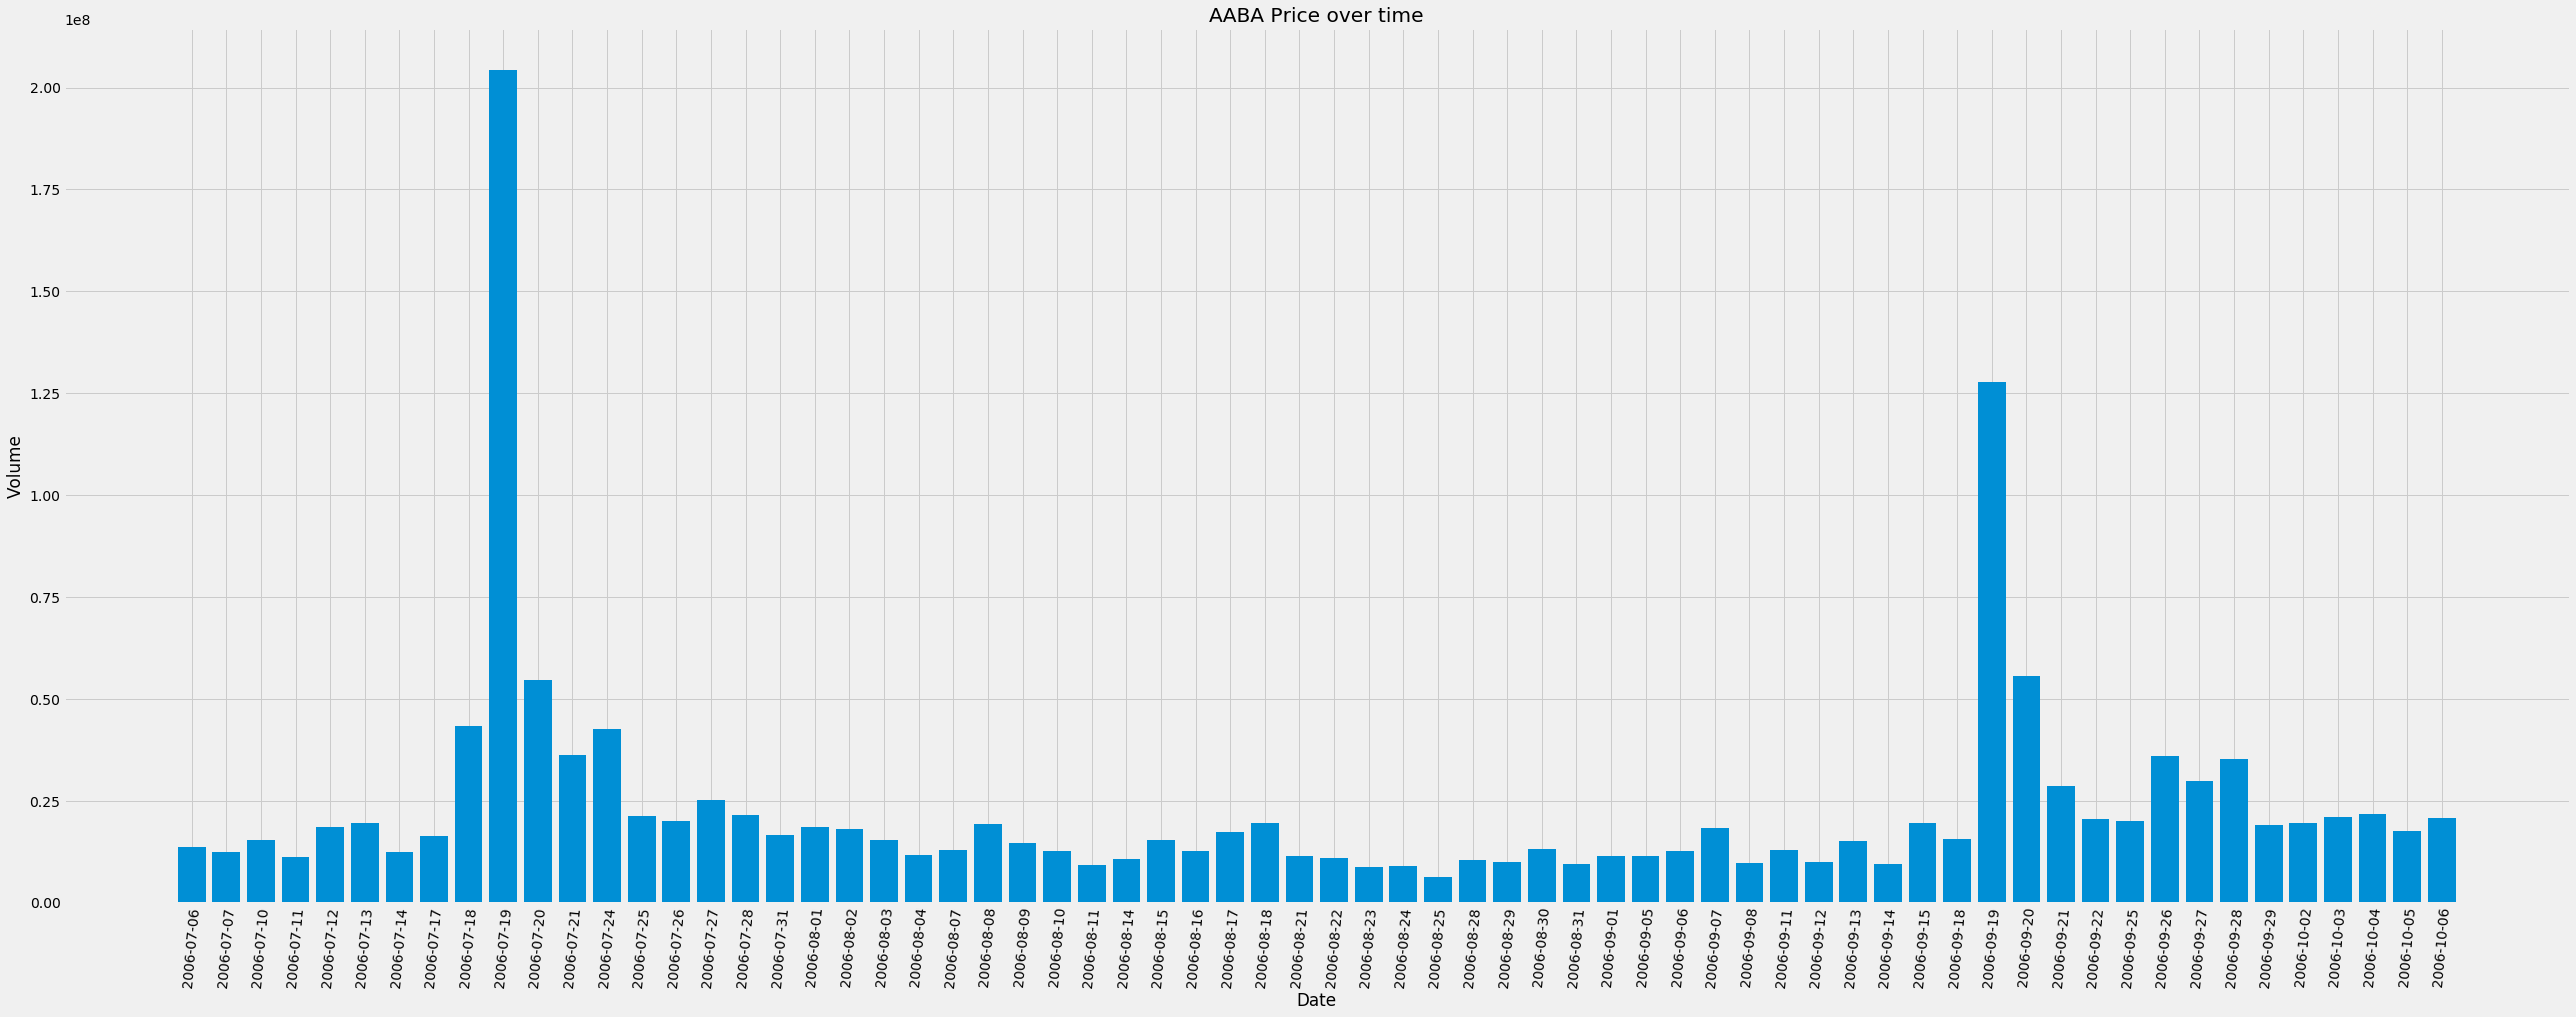

In [31]:
fig, ax = plt.subplots(figsize=(40,15))

plt.bar(AABA_RANGE["Date"], AABA_RANGE['Volume'])
ax.set_xlabel("Date")
ax.set_ylabel("Volume")

plt.xticks(rotation=85)
ax.set_title("AABA Price over time")

In [32]:
#You can see that AABA's trade volume was higher on days when the price dropped dramatically.
#Generally large price swings have large volumes

In [33]:
#Candle Stick Charts are incredibly popular for stock analysis and identifying patterns.
#The whiskers show the daily high and low stock price
#The box is difference between the stocks open and close
#Boxes are generally black or green if the daily stock price closes higher than it opened
#Boxes are generally red if the daily stock price closes lower than it opened
#I'm going to create a candle stick chart and add the daily stock price data to it.

In [34]:
#Steps to Create Candle Stick Chart.
#1. Add the median daily stock price
# Since the box plot includes the 0, first quartile, second quartile, third quartile and 100 values we need the median
# median will be calculated by taking the open price and close price and dividing by two.
#2. Set the Date to the index
#3. Drop the Volume, Name and Rolling Mean columns and transpose the data around the date
#We'll want to get rid of these values when creating the box. otherwise the quartiles will be off
#4. Plot the Box. Since we have 5 values High and Low will be the wiskers and Open and Close will form the Box. Median will be the median.

In [35]:
#1
AABA_RANGE['Median'] = (AABA_RANGE["Open"] + AABA_RANGE["Close"]) /2
#2
AABA_RANGE.set_index("Date", inplace=True)
#3
AABA_RANGE = AABA_RANGE.drop(columns=['Volume','Name',"Rolling Mean"]).T
#4 print dataframe to show 5 values under each date
AABA_RANGE

/Users/michaelsturm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Date,2006-07-06,2006-07-07,2006-07-10,2006-07-11,2006-07-12,2006-07-13,2006-07-14,2006-07-17,2006-07-18,2006-07-19,...,2006-09-25,2006-09-26,2006-09-27,2006-09-28,2006-09-29,2006-10-02,2006-10-03,2006-10-04,2006-10-05,2006-10-06
Open,32.77,32.94,32.91,32.79,33.030,32.85,32.34,31.98,32.08,26.410,...,25.640,25.440,25.000,24.87,25.50,25.450,24.80,24.89,25.16,25.09
High,33.22,33.05,33.14,33.35,33.740,33.16,32.48,32.40,32.26,26.700,...,25.870,25.480,25.010,25.50,25.59,25.460,25.00,25.26,25.25,25.50
Low,32.70,32.37,32.73,32.32,32.990,32.07,31.85,31.69,31.25,25.040,...,25.200,24.810,24.600,24.84,25.24,24.750,24.70,24.74,24.88,25.01
Close,33.11,32.50,32.85,33.17,33.380,32.23,32.08,31.84,32.24,25.200,...,25.290,25.050,24.650,25.33,25.28,24.880,24.84,25.21,25.18,25.47
Median,32.94,32.72,32.88,32.98,33.205,32.54,32.21,31.91,32.16,25.805,...,25.465,25.245,24.825,25.10,25.39,25.165,24.82,25.05,25.17,25.28


In [36]:
# Plotting the Candle Stick Chart
# Return a dictionary from the plot to color the boxes
# When the Stock closing price is higer than the open price color the box green
# When the Stock closing price is lower than the open price color the box red

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 66 Text xticklabel objects>)

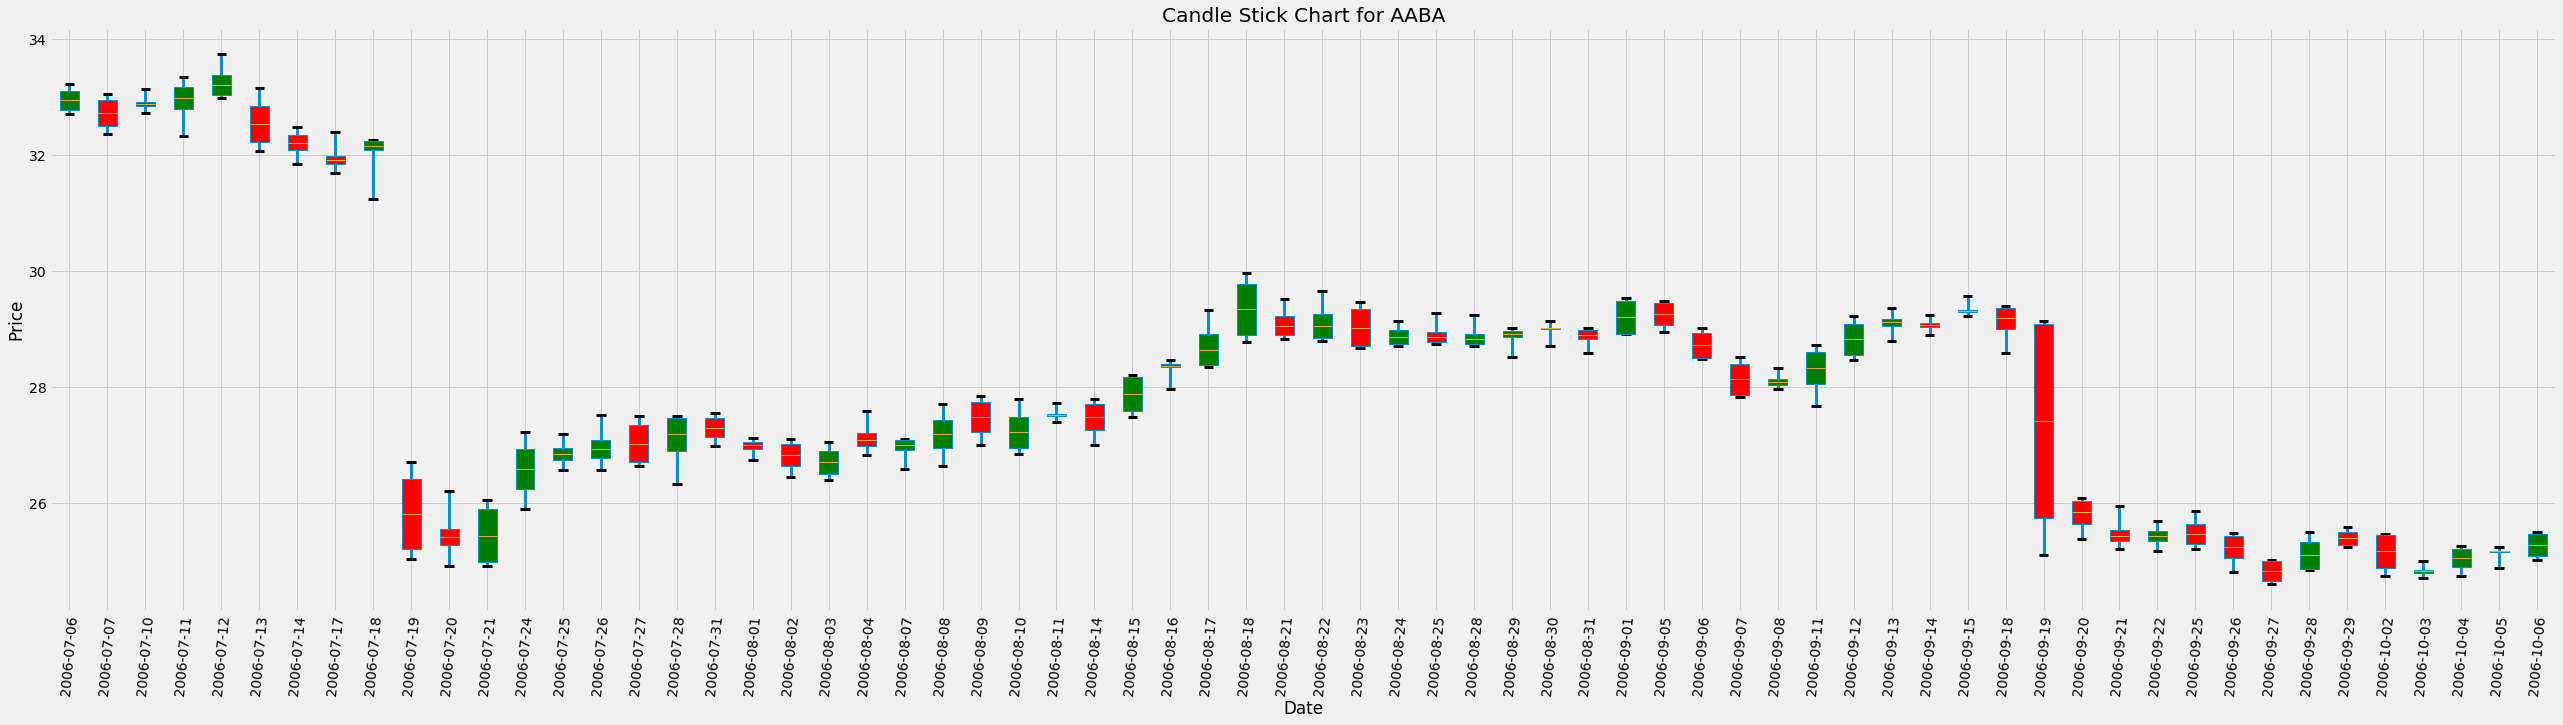

In [55]:
fig, ax = plt.subplots(figsize=(40,10))

bp_dict = AABA_RANGE.boxplot(whis=99, autorange=False, return_type='dict', whiskerprops=dict(color="black", linewidth=3), capprops=dict(color="black", linewidth=3), flierprops=dict(color="black", linewidth=3), patch_artist=True)

x = 0
for column in AABA_RANGE:
    if (AABA_RANGE[column].iloc[0] - AABA_RANGE[column].iloc[4]) <= 0:
        bp_dict['boxes'][x].set_facecolor('green')
    else:
        bp_dict['boxes'][x].set_facecolor('red')
    x = x+1
    
ax.set_title("Candle Stick Chart for AABA")
# Set the y axis label
ax.set_ylabel('Price')
# Set the y axis label
ax.set_xlabel('Date')
plt.xticks(rotation=85)

In [276]:
#Over this 3 month period AABA seemed to struggle.

#What's up with 7-18 and 7-19? Turns out that AABA filed an 8K on the 18th. 
#based on the lower opening stock price the next morning the 8K did not have good news

#https://www.sec.gov/Archives/edgar/data/1011006/000115752306006967/0001157523-06-006967-index.htm

#What's up with 9-19? Another 8K with more bad news.

#https://www.sec.gov/Archives/edgar/data/1011006/000110465906061788/0001104659-06-061788-index.htm

#From the 8K:

#Over the last few weeks, we are starting to see some advertising weakness in some of the most economically sensitive categories.

#This is having an impact on our expected Q3 results, leading us to believe we are likely to report results in the lower half of the business outlook ranges we provided in our earnings release on July 18, 2006 (furnished on a Current Report on Form 8-K on July 18, 2006).

#It is too early to tell whether the advertising weakness is due to an economic issue or specific issues in advertisers’ client businesses. Growth is still positive, but it is slower in Q3 than it was in the first half of the year.

In [277]:
#3. A Comparison of two stocks. CAT (Caterpillar) and WMT (Wal Mart). 
#We will take a look at how each performed during the 2008 market crash.
#Each stock will be compared against the market average for a time period. 

In [38]:
#Set the time frame during the recession.
start_date = "2008-04-20"
end_date = "2009-04-20"

In [39]:
#Pull each stock and the overall market information into variables.
CAT = stocks['CAT']
WMT = stocks['WMT']
all_stocks = all_stocks_2006.groupby("Date", as_index=False).mean()

In [40]:
#Set the rolling mean
CAT["Rolling Mean"] = CAT.Close.rolling(10).mean()
WMT["Rolling Mean"] = WMT.Close.rolling(10).mean()
all_stocks['Rolling Mean'] = all_stocks.Close.rolling(10).mean()

In [41]:
#Set the date filter and apply it
datefilter = (CAT["Date"] >= start_date) & (CAT["Date"] <= end_date)

CAT_RANGE = CAT.loc[datefilter]
WMT_RANGE = WMT.loc[datefilter]
all_stocks_range = all_stocks.loc[datefilter]

In [42]:
#Name variables for cleaner prints
cat_name = "Caterpillar"
wmt_name = "Walmart"

In [43]:
#Printing the values only this time instead of the entire row of the dataframe.

In [44]:
print(f"{cat_name} all time highest price")
print(CAT_RANGE["Close"].loc[CAT_RANGE["Close"].idxmax()])
print(f"\n{cat_name} all time lowest price")
print(CAT_RANGE["Close"].loc[CAT_RANGE["Close"].idxmin()])
print(f"\n{cat_name} highest volume")
print(CAT_RANGE["Volume"].loc[CAT_RANGE["Volume"].idxmax()])
print(f"\n {cat_name} starting price")
print(CAT_RANGE["Open"].loc[CAT_RANGE.index[0]])
print(f"\n {cat_name} price end")
print(CAT_RANGE["Close"].iloc[-1])

Caterpillar all time highest price
84.28

Caterpillar all time lowest price
22.17

Caterpillar highest volume
47444414

 Caterpillar starting price
83.89

 Caterpillar price end
30.48


In [45]:
print(f"{wmt_name} all time highest price")
print(WMT_RANGE["Close"].loc[WMT_RANGE["Close"].idxmax()])
print(f"\n{wmt_name} all time lowest price")
print(WMT_RANGE["Close"].loc[WMT_RANGE["Close"].idxmin()])
print(f"\n{wmt_name} highest volume")
print(WMT_RANGE["Volume"].loc[WMT_RANGE["Volume"].idxmax()])
print(f"\n{wmt_name} starting price")
print(WMT_RANGE["Open"].loc[WMT_RANGE.index[0]])
print(f"\n{wmt_name} ending price")
print(WMT_RANGE["Close"].iloc[-1])

Walmart all time highest price
63.17

Walmart all time lowest price
46.42

Walmart highest volume
92838774

Walmart starting price
56.07

Walmart ending price
49.27


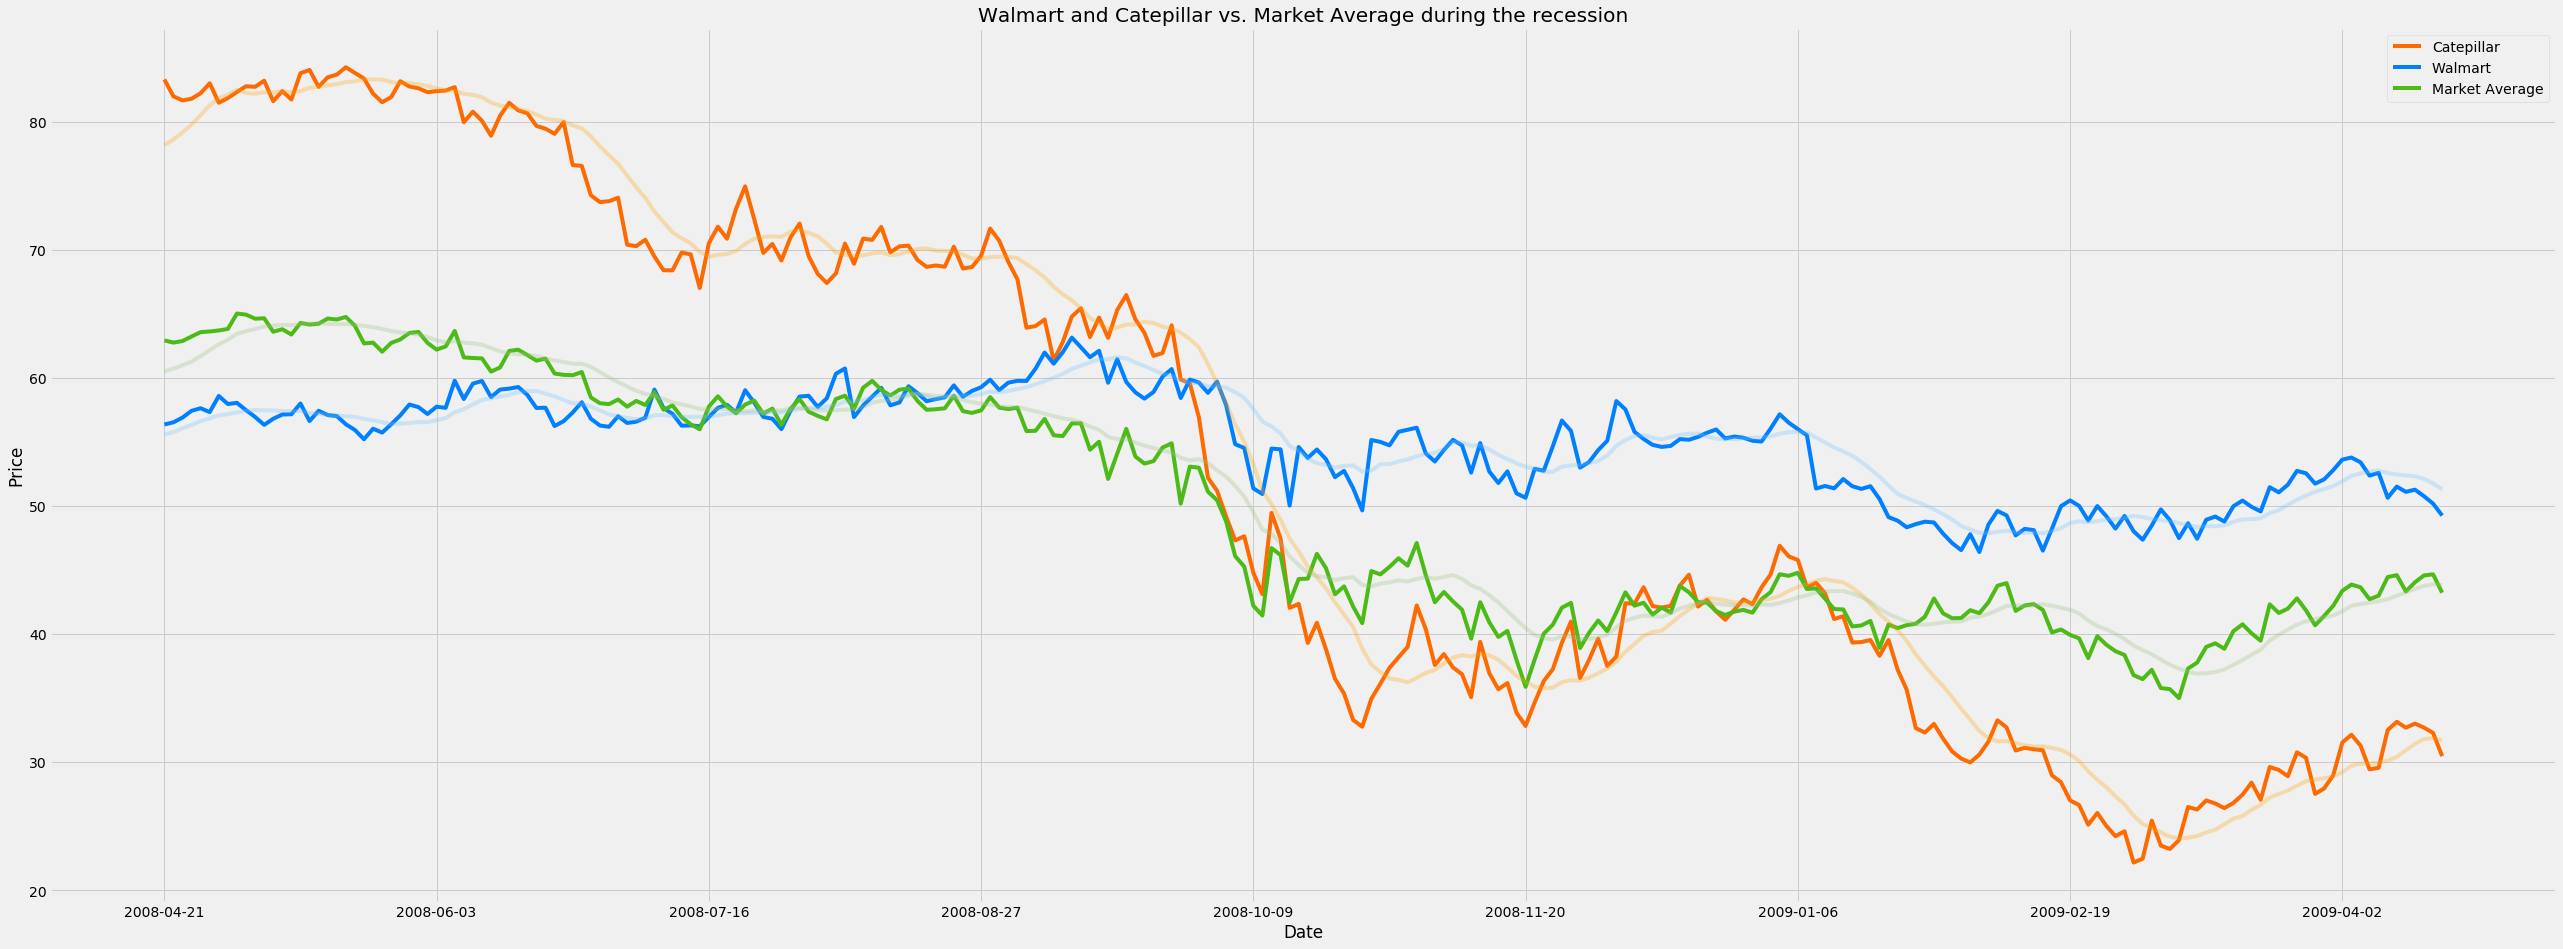

In [46]:
# Plotting the Price and Rolling Mean
fig, ax = plt.subplots(figsize=(40,15))

#Create line graphs for closing price
plt.plot(CAT_RANGE["Date"], CAT_RANGE['Close'], Color="#FD6A02", linewidth=4)  
plt.plot(WMT_RANGE["Date"], WMT_RANGE['Close'], Color="#0080FF", linewidth=4) 
plt.plot(all_stocks_range["Date"], all_stocks_range["Close"], Color="#4CBB17", linewidth=4)

#Create transparent line graphs for rolling mean
plt.plot(CAT_RANGE["Date"], CAT_RANGE['Rolling Mean'], Color="#FDA50F", linewidth=4, alpha=0.3)
plt.plot(WMT_RANGE["Date"], WMT_RANGE['Rolling Mean'], Color="#73C2FB", linewidth=4, alpha=0.3)
plt.plot(all_stocks_range["Date"], all_stocks_range["Rolling Mean"], Color="#9dc183", linewidth=4, alpha=0.3)

# Set the y and x axis label
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

# Set the chart's title
ax.set_title('Walmart and Catepillar vs. Market Average during the recession')

# Adding the legend and showing the plot
plt.legend(['Catepillar','Walmart','Market Average'], loc='upper right')
plt.show()

In [287]:
#Conclusion: Catepillar, a construction company, was significantly hurt by the housing market crash. 
#Grocery stores are considered safer investements during recessions. 
#Here you can see Walmart stayed mostly flat during the crash.
#Compared to the market average, Walmart was a safer investement in 2008 than Catepillar.
#Based on the limited evidence: Less risky investements do better during market crashes.

In [288]:
#4. Let's compare a few tech stocks (Google: GOOGL, Apple: APPl, Amazon: AMZN) with high dividend (Exxon: XOM, Verizon: VZ)

In [47]:
GOOGL = stocks['GOOGL']
AAPL = stocks['AAPL']
AMZN = stocks['AMZN']
XOM = stocks['XOM']
VZ = stocks['VZ']
#add each stock to a list
stocklist = [GOOGL, AAPL, AMZN, XOM, VZ]
#combine the stocks into a single dataframe
stocklistdf = pd.concat(stocklist)

In [48]:
#Creating a summary dataframe to compare starting, ending, all time high and all time low prices along with the highest volume.

In [49]:
#dictionary to hold data
stocksd = {}

#lists for each type of data we want to capture
priceStart = []
priceEnd = []
priceHighs = []
priceLows = []
volumeHighs = []
names = []

#loop through the stock dataframes to populate our lists
for item in stocklist:
    prices = {}
    priceHighs.append(item.loc[item["Close"].idxmax()]["Close"])
    priceLows.append(item.loc[item["Close"].idxmin()]["Close"])
    priceStart.append(item.loc[0]["Open"])
    priceEnd.append(item.iloc[-1]["Close"])
    volumeHighs.append(item.loc[item["Volume"].idxmax()]["Volume"])
    names.append(item.iloc[0].Name)

#populate dictionary with lists
stocksd["Name"] = names
stocksd["Start"] = priceStart
stocksd["End"] = priceEnd
stocksd["High"] = priceHighs
stocksd["Low"] = priceLows
stocksd["Volume"] = volumeHighs

#create dataframe from dictionary
stocksdf = pd.DataFrame(data=stocksd,dtype=float)

#add alltime growth to stocks
stocksdf["Percent Growth"] = ((stocksdf["End"] - stocksdf["Start"])/stocksdf["Start"])*100  
#print stock information out
stocksdf

,Name,Start,End,High,Low,Volume,Percent Growth
0,GOOGL,211.47,1053.40,1085.09,128.85,41182889.0,398.132123
1,AAPL,10.34,169.23,176.42,7.24,843264044.0,1536.653772
2,AMZN,47.47,1169.47,1195.83,26.07,104404589.0,2363.598062
3,XOM,56.42,83.64,104.38,56.57,118023466.0,48.245303
4,VZ,30.20,52.93,56.53,25.08,618237630.0,75.264901


In [50]:
#While Google has a higher overall stock price Apple expierenced much higher growth over the same period.
#Technology stocks saw significantly higher growth than dividend paying stocks.
#Let's visualize this growth with a box chart.

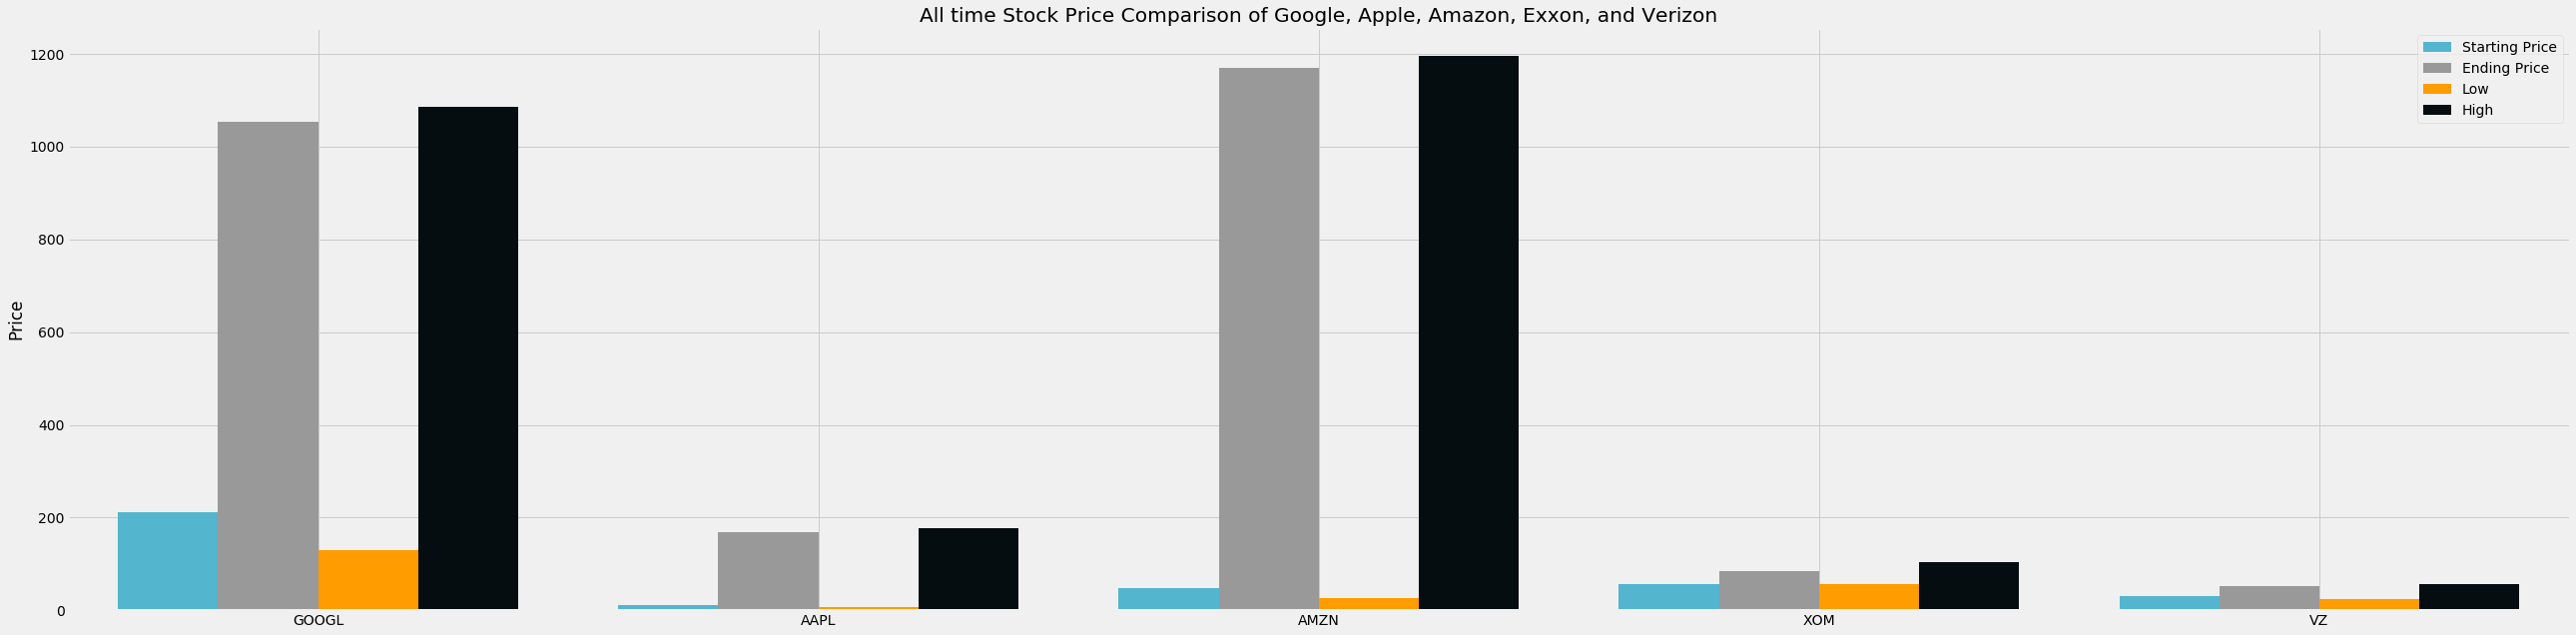

In [56]:
# Setting the positions and width for the bars
pos = list(range(len(stocksdf['Start']))) 
width = 0.2 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(40,10))

plt.bar(pos, 
        stocksdf['Start'], 
        width,  
        color='#53B5CE', 
        label=stocksdf['Name'][0]) 

plt.bar([p + width for p in pos], 
        stocksdf['End'],
        width, 
        color='#999999', 
        label=stocksdf['Name'][1]) 

plt.bar([p + width*2 for p in pos], 
        stocksdf['Low'], 
        width, 
        color='#FE9C00', 
        label=stocksdf['Name'][2]) 

plt.bar([p + width*3 for p in pos], 
        stocksdf['High'], 
        width, 
        color='#050D10', 
        label=stocksdf['Name'][3]) 

# Set the y axis label
ax.set_ylabel('Price')

# Set the chart's title
ax.set_title('All time Stock Price Comparison of Google, Apple, Amazon, Exxon, and Verizon')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(stocksdf['Name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)

# Adding the legend and showing the plot
plt.legend(['Starting Price', 'Ending Price', 'Low', 'High'], loc='upper right')
plt.show()

In [52]:
#All time growth can also be visualized with a line chart.

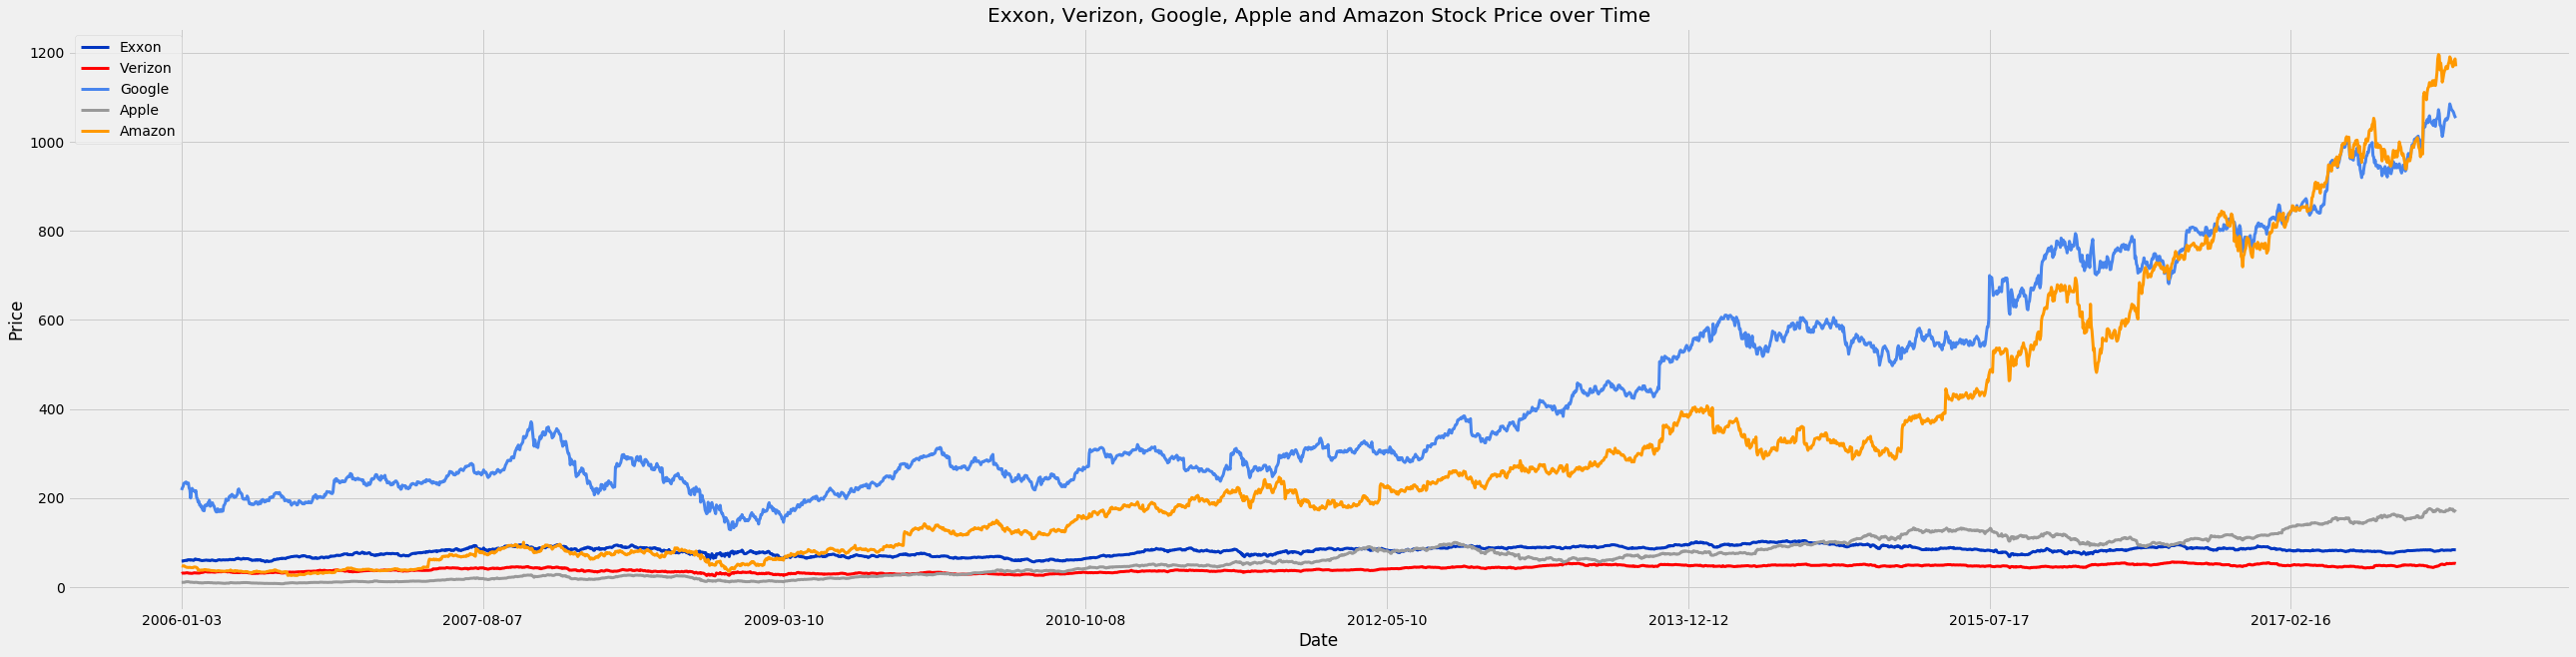

In [54]:
# Plotting the Price
fig, ax = plt.subplots(figsize=(40,10))

#Create line graphs for closing price and rolling mean
plt.plot(XOM["Date"], XOM['Close'], Color="#0036C1", linewidth=3) 
plt.plot(VZ["Date"], VZ['Close'], Color="#FF0000", linewidth=3) 
plt.plot(GOOGL["Date"], GOOGL['Close'], Color="#4885ed", linewidth=3) 
plt.plot(AAPL["Date"], AAPL['Close'], Color="#999999", linewidth=3) 
plt.plot(AMZN["Date"], AMZN['Close'], Color="#FF9900", linewidth=3) 

# Set the y and x axis label
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

# Set the chart's title
ax.set_title('Exxon, Verizon, Google, Apple and Amazon Stock Price over Time')

# Adding the legend and showing the plot
plt.legend(['Exxon','Verizon','Google','Apple','Amazon'], loc='upper left')
plt.show()

In [194]:
#The line chart is clearly better for visualizing time series data such as a stock price.

#As expected the tech companies showed much higher growth than the mature dividend paying companies. 
#Apple's growth still doesn't look as big given it's small initial starting price.

#The line colors are the offical logo colors of each company :)